In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mcdonalds/mcdonalds.csv


In [2]:
df=pd.read_csv('../input/mcdonalds/mcdonalds.csv')

In [3]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [6]:
binary=['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']
df[binary] = df[binary].apply(lambda x:x.map({'Yes':1, 'No':0}))

In [7]:
def discover(df, target=''):
    
    #Creating Seris with Feature Types, removing the target feature
    if target != '':
        df1 = df.drop(target, axis = 1, inplace = False)
    else:
        df1 = df

    #listing feature type
    feature_type = []
    for j in range(len(df1.columns)):
        if df1[df1.columns[j]].nunique()==2:
            feature_type.append('Binary')
        elif df1[df1.columns[j]].dtypes != 'O' and df1[df1.columns[j]].nunique()>10:
            feature_type.append('Numerical')
        elif df1[df1.columns[j]].dtypes != 'O' and df1[df1.columns[j]].nunique()<10:
            feature_type.append('Ordinal')
        elif df1[df1.columns[j]].nunique()<10:
            feature_type.append('Ordinal')
        else:
            feature_type.append('Identifier')
    
    #listing feature content
    features_content = []
    for i in range(len(df1.columns)):
        if df1[df1.columns[i]].nunique()<10: 
            features_content.append(df1[df1.columns[i]].unique())
        else:
            features_content.append('n = ' + str(df1[df1.columns[i]].nunique()))
            
    #listing empty cells feature type
    num_of_empty = []
    for k in df1.columns:
        num_of_empty.append(df1[k].isnull().sum())

    #listing empty cells ratio feature type
    ratio_of_empty = []
    for k in df1.columns:
        ratio_of_empty.append(round(100*df1[k].isnull().sum()/df1[k].isnull().count(),2))
    
    discovered = pd.DataFrame({'Features': df1.columns, 
                               'Features Content': features_content, 
                               'Feature Type': feature_type, 
                               'Empty Cells': num_of_empty,
                               '% Empty': ratio_of_empty
                             })
    discovered = discovered.sort_values(['Feature Type','Empty Cells'],ascending=False)
    print("Shape of Dataset: ",df.shape)
    return discovered

In [8]:
discover(df)

Shape of Dataset:  (1453, 15)


,Features,Features Content,Feature Type,Empty Cells,% Empty
13,VisitFrequency,"[Every three months, Once a week, Once a month...",Ordinal,0,0.0
12,Age,n = 54,Numerical,0,0.0
11,Like,n = 11,Identifier,0,0.0
0,yummy,"[0, 1]",Binary,0,0.0
1,convenient,"[1, 0]",Binary,0,0.0
2,spicy,"[0, 1]",Binary,0,0.0
3,fattening,"[1, 0]",Binary,0,0.0
4,greasy,"[0, 1]",Binary,0,0.0
5,fast,"[1, 0]",Binary,0,0.0
6,cheap,"[1, 0]",Binary,0,0.0


In [9]:
df.VisitFrequency.unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [10]:
df.Like.unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [11]:
round(df[binary].mean(),2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [12]:
from sklearn.decomposition import PCA
pca=PCA()

In [13]:
X=df[binary]

In [14]:
prince=pca.fit_transform(X)

In [15]:
pdf=pd.DataFrame(data=prince,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11'])
comp=pd.DataFrame(pca.components_.T,index=binary,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11'])*-1
comp

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
yummy,0.476933,-0.363790,0.304444,-0.055162,0.307535,-0.170738,0.280519,-0.013041,-0.572403,0.110284,-0.045439
convenient,0.155332,-0.016414,0.062515,0.142425,-0.277608,0.347830,0.059738,0.113079,0.018465,0.665818,0.541616
spicy,0.006356,-0.018809,0.037019,-0.197619,-0.070620,0.355087,-0.707637,-0.375934,-0.400280,0.075634,-0.141730
fattening,-0.116232,0.034094,0.322359,0.354139,0.073405,0.406515,0.385943,-0.589622,0.160512,0.005338,-0.250910
greasy,-0.304443,0.063839,0.802373,-0.253960,-0.361399,-0.209347,-0.036170,0.138241,0.002847,-0.008707,-0.001642
fast,0.108493,0.086972,0.064642,0.097363,-0.107930,0.594632,0.086846,0.627799,-0.166197,-0.239532,-0.339265
cheap,0.337186,0.610633,0.149310,-0.118958,0.128973,0.103241,0.040449,-0.140060,-0.076069,-0.428087,0.489283
tasty,0.471514,-0.307318,0.287265,0.002547,0.210899,0.076914,-0.360453,0.072792,0.639086,-0.079184,-0.019552
expensive,-0.329042,-0.601286,-0.024397,-0.067816,0.003125,0.261342,0.068385,-0.029539,-0.066996,-0.454399,0.490069
healthy,0.213711,-0.076593,-0.192051,-0.763488,-0.287846,0.178226,0.349616,-0.176303,0.185572,0.038117,-0.157608


AxesSubplot(0.125,0.125;0.775x0.755)


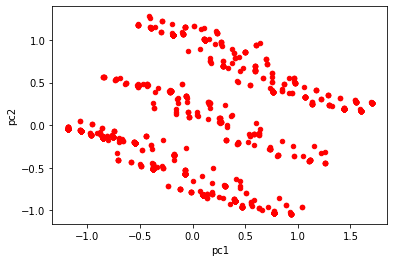

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
ax1 = pdf.plot(kind='scatter', x='pc1', y='pc2',color='r')
print(ax1)

<BarContainer object of 11 artists>

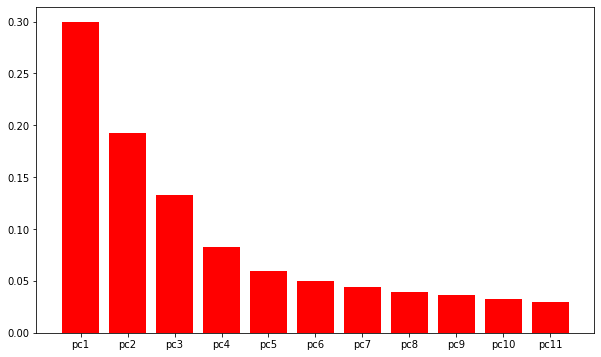

In [17]:
plt.figure(figsize = (10,6))
plt.bar(['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11'],pca.explained_variance_ratio_,color='red')

In [18]:
from sklearn.cluster import KMeans
wcss = [] 
for k in range(1,20):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42) 
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

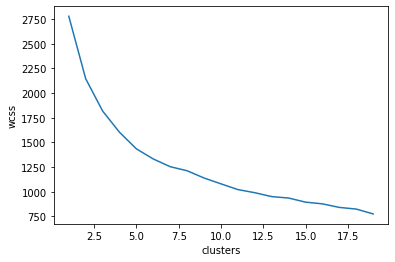

In [19]:
#Elbow Method
plt.plot(range(1,20),wcss)
plt.xlabel("clusters")
plt.ylabel("wcss")
plt.show()

In [20]:
kmeans = KMeans(8)
kmeans.fit(X)

df_1=pd.concat([X,pd.DataFrame({'cluster':kmeans.labels_})], axis = 1)
df_1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,6
1,1,1,0,1,1,1,1,1,1,0,0,5
2,0,1,1,1,1,1,0,1,1,1,0,7
3,1,1,0,1,1,1,1,1,0,0,1,5
4,0,1,0,1,1,1,1,0,0,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,4
1449,1,1,0,1,0,0,1,1,0,1,0,2
1450,1,1,0,1,0,1,0,1,1,0,0,3
1451,1,1,0,0,0,1,1,1,0,1,0,2


In [21]:
group=df_1.groupby(['cluster'])
group.mean()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
cluster,,,,,,,,,,,
0,0.021127,0.838028,0.077465,0.964789,0.781690,0.950704,0.901408,0.147887,0.070423,0.042254,1.000000
1,0.796209,0.981043,0.085308,0.971564,0.000000,0.981043,0.900474,0.962085,0.018957,0.000000,0.014218
2,0.946524,0.967914,0.106952,0.363636,0.016043,0.946524,0.850267,0.978610,0.112299,0.866310,0.016043
3,1.000000,0.970732,0.068293,0.965854,0.570732,0.853659,0.000000,0.941463,1.000000,0.160976,0.073171
4,0.026490,0.516556,0.079470,0.947020,0.834437,0.682119,0.039735,0.086093,0.953642,0.026490,0.980132
5,0.864286,0.982143,0.125000,0.985714,1.000000,0.957143,0.914286,0.950000,0.114286,0.182143,0.132143
6,0.000000,0.942029,0.050725,0.905797,0.528986,0.978261,0.942029,0.000000,0.028986,0.115942,0.000000
7,0.028777,0.935252,0.136691,0.776978,0.395683,0.776978,0.007194,0.410072,0.719424,0.122302,0.035971


In [22]:
df.replace({'I love it!+5': '+5', 'I hate it!-5':'-5'}, inplace=True)
df['Like'].unique()

array(['-3', '+2', '+1', '+4', '+5', '-5', '-2', '+3', '0', '-4', '-1'],
      dtype=object)

In [23]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['Like'])

for i, feature in enumerate(X.columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()